# Boston housing dataset
*exploratory analysis

In [12]:
from sklearn.datasets import load_boston
import pandas as pd

In [5]:
boston = load_boston()

x = boston.data
y = boston.target

In [8]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
df = pd.DataFrame(x)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [18]:
#Normalize the dataset
#Each feature must have 0 mean, unit variance
import numpy as np
u = np.mean(x,axis = 0)
std = np.std(x, axis = 0)
u.shape, std.shape


((13,), (13,))

In [20]:
#Normalize data
x = (x-u)/std
pd.DataFrame(x[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.469369,-0.475498,-1.812878,-1.346909,-6.037437,-8.364118,-2.442830,-1.737393,-1.210791,-2.428595,-9.207734,-3.905866,-1.924393
1,-0.469085,-0.508655,-1.711540,-1.346909,-11.186268,-8.676684,-2.425506,-1.539190,-1.197575,-2.430500,-8.673286,-3.905866,-1.842655
2,-0.469085,-0.508655,-1.711540,-1.346909,-11.186268,-7.126030,-2.448015,-1.539190,-1.197575,-2.430500,-8.673286,-3.906355,-1.943060
3,-0.469016,-0.508655,-1.815646,-1.346909,-12.007096,-7.505575,-2.467363,-1.291723,-1.184359,-2.431205,-8.480885,-3.906139,-1.964477
4,-0.468519,-0.508655,-1.815646,-1.346909,-12.007096,-7.203157,-2.456741,-1.291723,-1.184359,-2.431205,-8.480885,-3.905866,-1.917516


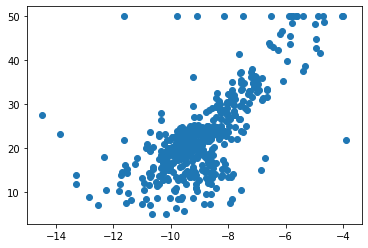

In [26]:
#plot y as any feature
import matplotlib.pyplot as plt
plt.scatter(x[:,5],y)
plt.show()